<a href="https://colab.research.google.com/github/mmazurek-wat/nlp-en-lab/blob/main/NLP_EN_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  NLP Programming assignment LSA  / SVD



---

1. Create corpora containing at least 7 documents from three domains (sport, politics, etc.) 
2. Construct document-term-matrix. Apply necessary preprocessing (remove stopwords)
3. Perform LSI using SVD
*   find matrices U, S, V.
*   visualize concepts as wordcloud of terms 
*   visualize document topics on radar plot 


---

# 1. Corpora





You can any corpus of your choice. Possible sources:
 

*   newspaper articles (web-scraping libraries might be useful), 
*   any extracted texts - available under public url (git, pastebin)
*   nltk corpus (brown) 

##  newspaper articles 






In [ ]:
!pip install newspaper3k

In [ ]:
import newspaper

cnn_paper = newspaper.build('https://lite.cnn.com/')
articles = [article for article in cnn_paper.articles]


### custom texts 

You can use pastebin tool to access content of your texts

In [13]:
import requests

political_articles = ['https://pastebin.pl/view/raw/ece8580e','https://pastebin.pl/view/raw/44a3b706']
motorization_articles = ['https://pastebin.pl/view/raw/2a98ba2f', 'https://pastebin.pl/view/raw/178ca72d', 'https://pastebin.pl/view/raw/74659fed']
sport_articles = ['https://pastebin.pl/view/raw/9f74daab', 'https://pastebin.pl/view/raw/f54f0750']




### nltk corpora

In [14]:
import nltk
nltk.download('brown')



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [15]:
from nltk.corpus import brown

brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [16]:

categories = ['romance', 'religion', 'government']

fileids = brown.fileids(categories)
print(fileids)
corpus = [ " ".join(brown.words(fileids=fileid)) for fileid in fileids]



['cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd13', 'cd14', 'cd15', 'cd16', 'cd17', 'ch01', 'ch02', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'cp01', 'cp02', 'cp03', 'cp04', 'cp05', 'cp06', 'cp07', 'cp08', 'cp09', 'cp10', 'cp11', 'cp12', 'cp13', 'cp14', 'cp15', 'cp16', 'cp17', 'cp18', 'cp19', 'cp20', 'cp21', 'cp22', 'cp23', 'cp24', 'cp25', 'cp26', 'cp27', 'cp28', 'cp29']


In [17]:
categories_files = [ brown.fileids(category) for category in categories]
print(categories_files)

[['cp01', 'cp02', 'cp03', 'cp04', 'cp05', 'cp06', 'cp07', 'cp08', 'cp09', 'cp10', 'cp11', 'cp12', 'cp13', 'cp14', 'cp15', 'cp16', 'cp17', 'cp18', 'cp19', 'cp20', 'cp21', 'cp22', 'cp23', 'cp24', 'cp25', 'cp26', 'cp27', 'cp28', 'cp29'], ['cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd13', 'cd14', 'cd15', 'cd16', 'cd17'], ['ch01', 'ch02', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30']]


# Document term matrix

Prepare document term matrix (apply lemmatization)

In [ ]:
!python -m spacy download en_core_web_sm


In [19]:

import spacy
nlp = spacy.load("en_core_web_sm")

corpus_lemmatized = [" ".join([token.lemma_ for token in nlp(doc)]) for doc in corpus]
print(corpus_lemmatized[0])

as a result , although we still make use of this distinction , there be much confusion as to the meaning of the basic term employ . just what be mean by ` ` spirit '' and by ` ` matter '' ? ? the term be generally take for grant as though they refer to direct and axiomatic element in the common experience of all . yet in the contemporary context this be precisely what one must not do . for in the modern world neither ` ` spirit '' nor ` ` matter '' refer to any generally agree - upon element of experience . we be in a transitional stage in which many of the connotation of former usage have have to be revise or reject . when the word be use , we be never sure which of the traditional meaning the user may have in mind , or to what extent his revision and rejection of former understanding correspond to ours . one of the most widespread feature of contemporary thought be the almost universal disbelief in the reality of spirit . just a few century ago the world of spirit be as populous and 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', norm="l2")
dtm = None
terms = None

In [22]:
print(terms)


['00' '000' '001' ... 'zion' 'zip' 'zoooop']


Find indexes of sample tokens: 

In [24]:
sample_terms = ['god', 'church', 'state', 'tax']

#  TODO

['god', 'church', 'state', 'tax']
[1863, 4285, 8983, 9381]


Part of dtm matrix for selected terms:

In [25]:
#  TODO

matrix([[0.02407593, 0.01203796, 0.01021048, 0.        ],
        [0.109259  , 0.09560162, 0.        , 0.        ],
        [0.25709575, 0.00918199, 0.02336421, 0.        ],
        [0.00941136, 0.26351799, 0.02394785, 0.        ],
        [0.05718395, 0.        , 0.00970057, 0.        ],
        [0.02737469, 0.34218364, 0.01160947, 0.        ],
        [0.02664718, 0.22650105, 0.        , 0.        ],
        [0.        , 0.00868077, 0.        , 0.        ],
        [0.43855941, 0.02631356, 0.        , 0.        ],
        [0.07054098, 0.08464918, 0.10769785, 0.        ],
        [0.        , 0.01175096, 0.        , 0.        ],
        [0.03015962, 0.        , 0.03410811, 0.        ],
        [0.        , 0.        , 0.04120248, 0.        ],
        [0.14581214, 0.04486527, 0.00951357, 0.        ],
        [0.        , 0.0193254 , 0.0081958 , 0.        ],
        [0.03465511, 0.41586127, 0.        , 0.        ],
        [0.02988225, 0.0597645 , 0.        , 0.        ],
        [0.   

#  SVD

## SVD - matrices

In [26]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np


#  TODO


New coordinates, shape:  (76, 3)
[[ 2.70114927e-01  5.23647487e-03  2.12842345e-01]
 [ 2.71814688e-01  3.80981187e-02  2.88033554e-01]
 [ 2.26455631e-01  6.64157858e-02  2.38203609e-01]
 [ 2.37537544e-01 -2.70054238e-02  4.27977990e-01]
 [ 2.15115631e-01 -2.16695559e-02  1.14224079e-01]
 [ 3.89850277e-01 -3.76490124e-02  5.04336275e-01]
 [ 3.54158218e-01 -7.46725137e-02  2.92594877e-01]
 [ 1.47021228e-01  4.22894302e-02  8.24142452e-02]
 [ 2.64919440e-01  1.09548993e-01  2.42612810e-01]
 [ 3.22833386e-01  1.41147325e-01  2.50441529e-01]
 [ 2.43192347e-01  6.41015629e-02  1.22474950e-01]
 [ 2.21021300e-01  1.61579026e-01  1.23822023e-01]
 [ 2.04979113e-01  4.93085888e-03 -2.20948913e-02]
 [ 2.63563641e-01  7.54889176e-02  3.09418984e-01]
 [ 2.00370747e-01  2.49109137e-02  2.09772302e-01]
 [ 2.83579330e-01 -5.98370999e-02  5.34890502e-01]
 [ 3.81674044e-01  3.45337347e-03  1.21538720e-01]
 [ 2.04968087e-01  3.03380940e-01 -1.35098709e-01]
 [ 2.84443906e-01  3.45223969e-01 -5.49637944e-02

In [28]:

# TODO 

Term to topic coordinates for selected  sample terms:
['god', 'church', 'state', 'tax']
[[ 0.08932999  0.11702459  0.08428518  0.03663347]
 [ 0.00382311 -0.03180784  0.16457298  0.08324788]
 [ 0.15988686  0.34134614 -0.05390935 -0.07586897]]


## Topic visualization with wordclouds

For each topic generate pair of wordcloud charts: one with postive coordinates, one with negative (only)

In [29]:
def generateWordCloud( ):

  #TODO 

  return wordcloud

     
     

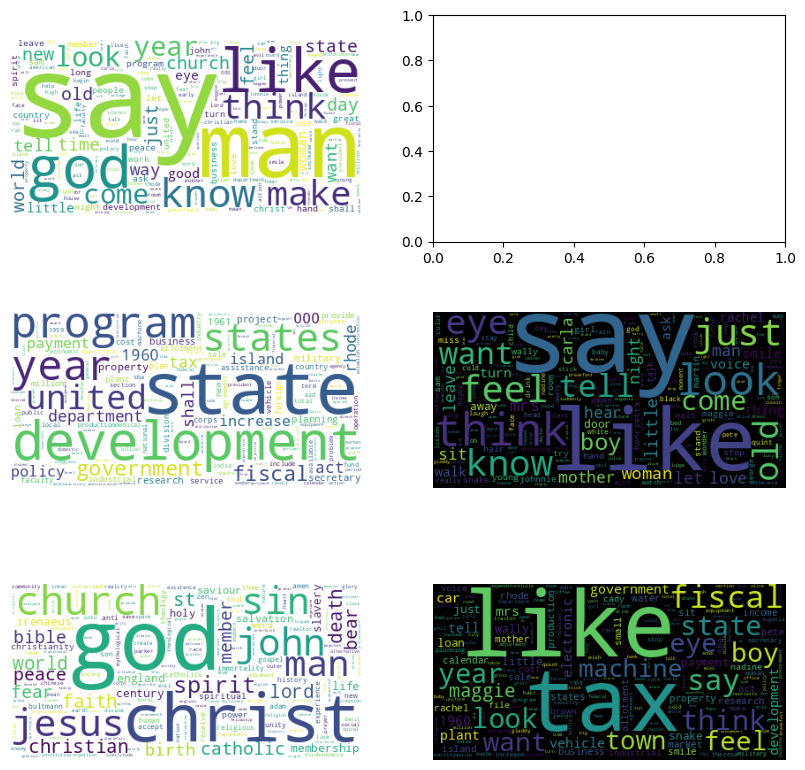

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler

fig = plt.figure(figsize=(10,10))
n_topics = 3 

for i in range(n_topics):
    ax = fig.add_subplot(3,2,2*i+1)
    #posititive
    wordcloud = None  
    if wordcloud:
      ax.imshow(wordcloud)
      ax.axis('off')


    #negative 
    ax = fig.add_subplot(3,2,2*i+2)
    wordcloud = generateWordCloud()   

    if wordcloud:
      ax.imshow(wordcloud)
      ax.axis('off')
      

In [47]:
# TODO

Range of coordinates:  -0.26313449878283773 0.5348905021694564


## Document visualization with radar charts

For randomly selected 5 files from each category plot radarchart.


In [36]:
import plotly.graph_objects as go
def radarChart(U,  docNames, docSelection):
  categories = ['category1','category2','category3']
  fig = go.Figure()

  for doc in docSelection:
    
    fig.add_trace(go.Scatterpolar(None))
  

  fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=None
        )),
      showlegend=False
    )

  fig.show()

In [43]:
docs_selection = range(5)
print([fileids[index] for index in docs_selection])
radarChart(U,fileids, docs_selection )

['cd01', 'cd02', 'cd03', 'cd04', 'cd05']


In [44]:
docs_selection =  range(20,25)
print([fileids[index] for index in docs_selection])
radarChart(U,fileids, docs_selection )

['ch04', 'ch05', 'ch06', 'ch07', 'ch08']


In [46]:
docs_selection =  range(50,55)
print([fileids[index] for index in docs_selection])
radarChart(U,fileids, docs_selection )

['cp04', 'cp05', 'cp06', 'cp07', 'cp08']
